# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [7]:
# Select only the first two features of iris.data.
X = iris.data[:, :2]
print(X.shape)

# Filter out samples where iris.target is equal to 2 to simplify the problem to a binary classification task.
mask = iris.target != 2
X_filtered = X[mask]
y_filtered = iris.target[mask]

print(X_filtered.shape)

# Split data into training and testing parts:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2)
SVMmodel = SVC(kernel='linear')
SVMmodel.fit(X_train, y_train)
SVMmodel.get_params()
SVMmodel.score(X_test, y_test)

(150, 2)
(100, 2)


1.0

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

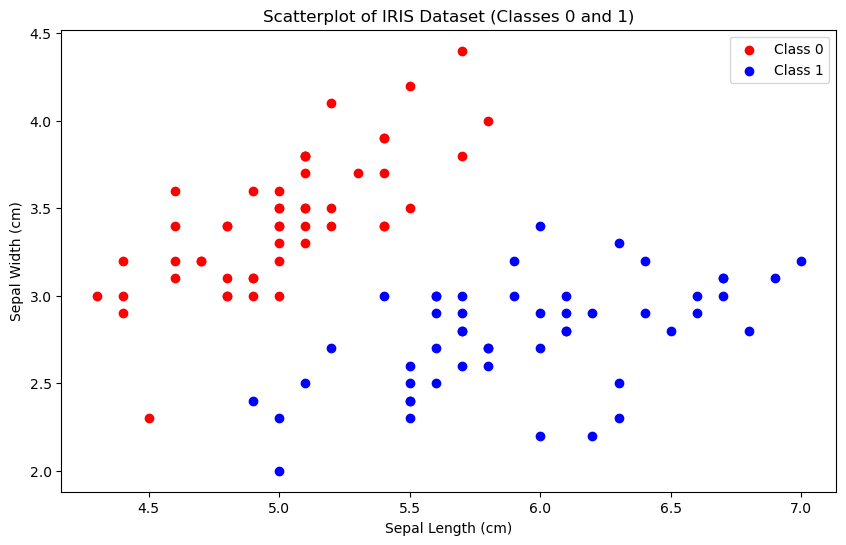

In [11]:
import matplotlib.pyplot as plt

# Filter data for classes 0 and 1 only
X_class0 = X_filtered[y_filtered == 0]
X_class1 = X_filtered[y_filtered == 1]

plt.figure(figsize=(10, 6))
plt.scatter(X_class0[:, 0], X_class0[:, 1], color='red', label='Class 0')
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='blue', label='Class 1')

plt.title('Scatterplot of IRIS Dataset (Classes 0 and 1)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [12]:
# Initialize and train SVM models with different values of C
SVMmodel_default = SVC(kernel='linear')  # Default C=1.0
SVMmodel_highC = SVC(kernel='linear', C=200)  # High regularization C=200


SVMmodel_default.fit(X_train, y_train)
SVMmodel_highC.fit(X_train, y_train)
score_default = SVMmodel_default.score(X_test, y_test)
score_highC = SVMmodel_highC.score(X_test, y_test)

(score_default, score_highC)

(1.0, 1.0)

There was no observable difference in performance between using the default value of C=1.0 and a higher value of C=200 for the SVM classifiers in this specific case, both achieving perfect accuracy.
This suggests that the choice of C did not impact the outcome for this relatively simple and linearly separable dataset. However, the selection of C could become crucial for handling more complex datasets.

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

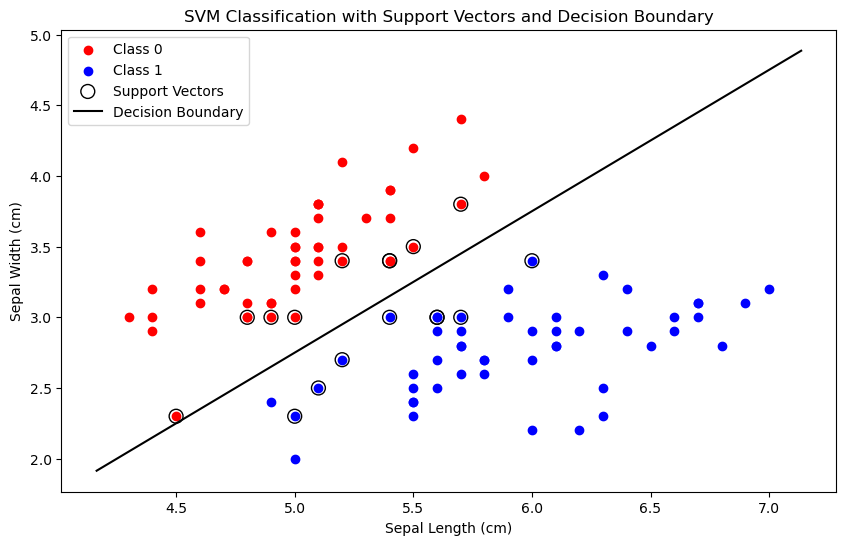

In [14]:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W = SVMmodel_default.coef_[0]
b = SVMmodel_default.intercept_[0]

# Calculate the slope and intercept for the decision boundary line
slope = -W[0] / W[1]
intercept = -b / W[1]

# Plot the data points and the support vectors

plt.figure(figsize=(10, 6))
plt.scatter(X_class0[:, 0], X_class0[:, 1], color='red', label='Class 0')
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='blue', label='Class 1')
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

ax = plt.gca()
xlim = ax.get_xlim()
xx = np.linspace(xlim[0], xlim[1])
yy = slope * xx + intercept
plt.plot(xx, yy, 'k-', label='Decision Boundary')

plt.title('SVM Classification with Support Vectors and Decision Boundary')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

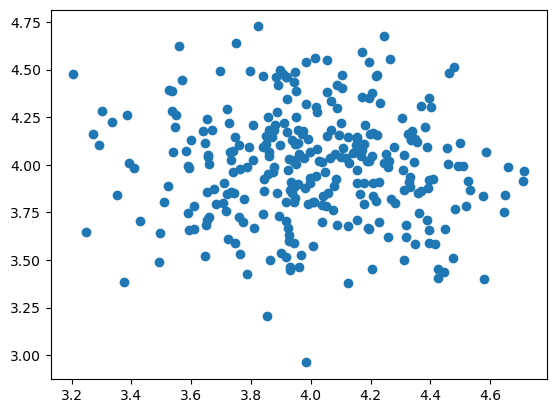

In [15]:

from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()


Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

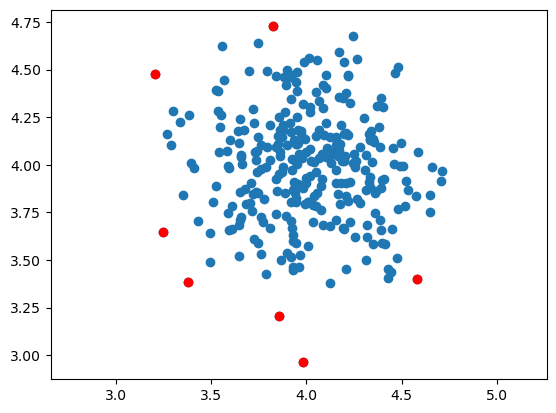

In [16]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

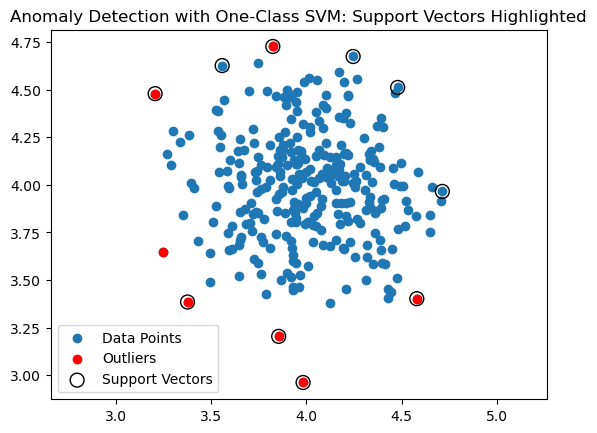

In [20]:
# Retrieve the support vectors from the trained one-class SVM model
support_vectors = SVMmodelOne.support_vectors_

# Plot the original data points
plt.scatter(x[:, 0], x[:, 1], label='Data Points')

# Highlight the outliers identified by the one-class SVM
plt.scatter(values[:, 0], values[:, 1], color='red', label='Outliers')

# Highlight the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, edgecolors='k', facecolors='none', linewidths=1, label='Support Vectors')


plt.axis('equal')
plt.title('Anomaly Detection with One-Class SVM: Support Vectors Highlighted')
plt.legend()
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


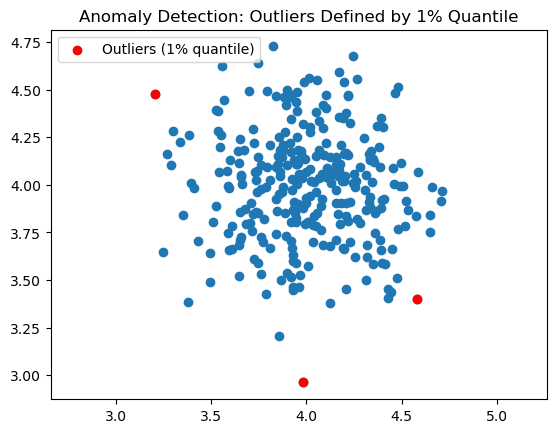

In [23]:
# Compute the score_samples from the one-class SVM
scores = SVMmodelOne.score_samples(x)

# Determine the threshold for outliers using the 1% quantile
thresh = quantile(scores, 0.01)
print(thresh)

# Identify indices of points with scores below the threshold
index = where(scores <= thresh)
values = x[index]

# Plot the original data points
plt.scatter(x[:, 0], x[:, 1])

# Highlight the points considered outliers based on the new threshold
plt.scatter(values[:, 0], values[:, 1], color='red', label='Outliers (1% quantile)')

# Ensure the axes are equal to emphasize the geometric distribution
plt.axis('equal')


plt.title('Anomaly Detection: Outliers Defined by 1% Quantile')
plt.legend()
plt.show()